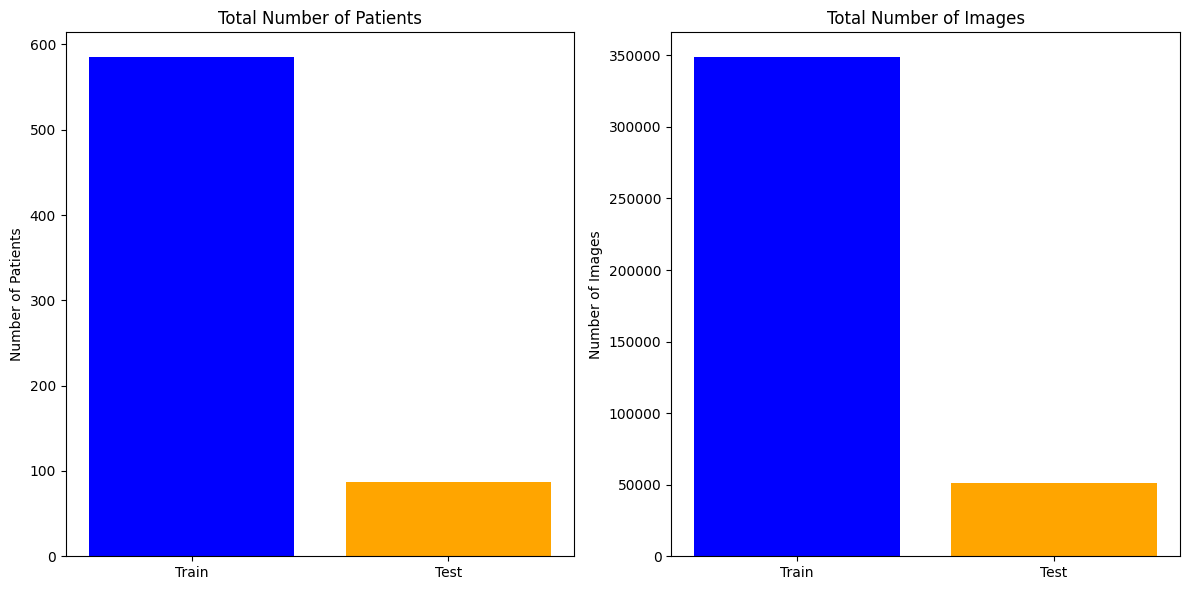

In [1]:
import os
import matplotlib.pyplot as plt

# Define the directory paths
train_dir = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train"
test_dir = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/test"

# Function to count patients and images
def count_patients_and_images(directory):
    patient_count = 0
    image_count = 0
    
    for patient_folder in os.listdir(directory):
        patient_path = os.path.join(directory, patient_folder)
        
        # Check if it's a folder
        if os.path.isdir(patient_path):
            patient_count += 1
            
            # Count images in each modality folder
            for modality in ["FLAIR", "T1w", "T1wCE", "T2w"]:
                modality_path = os.path.join(patient_path, modality)
                if os.path.isdir(modality_path):
                    image_count += len([img for img in os.listdir(modality_path) if img.endswith(".dcm")])

    return patient_count, image_count

# Get counts for training and testing sets
train_patients, train_images = count_patients_and_images(train_dir)
test_patients, test_images = count_patients_and_images(test_dir)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for number of patients
ax[0].bar(["Train", "Test"], [train_patients, test_patients], color=["blue", "orange"])
ax[0].set_title("Total Number of Patients")
ax[0].set_ylabel("Number of Patients")

# Bar plot for number of images
ax[1].bar(["Train", "Test"], [train_images, test_images], color=["blue", "orange"])
ax[1].set_title("Total Number of Images")
ax[1].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()

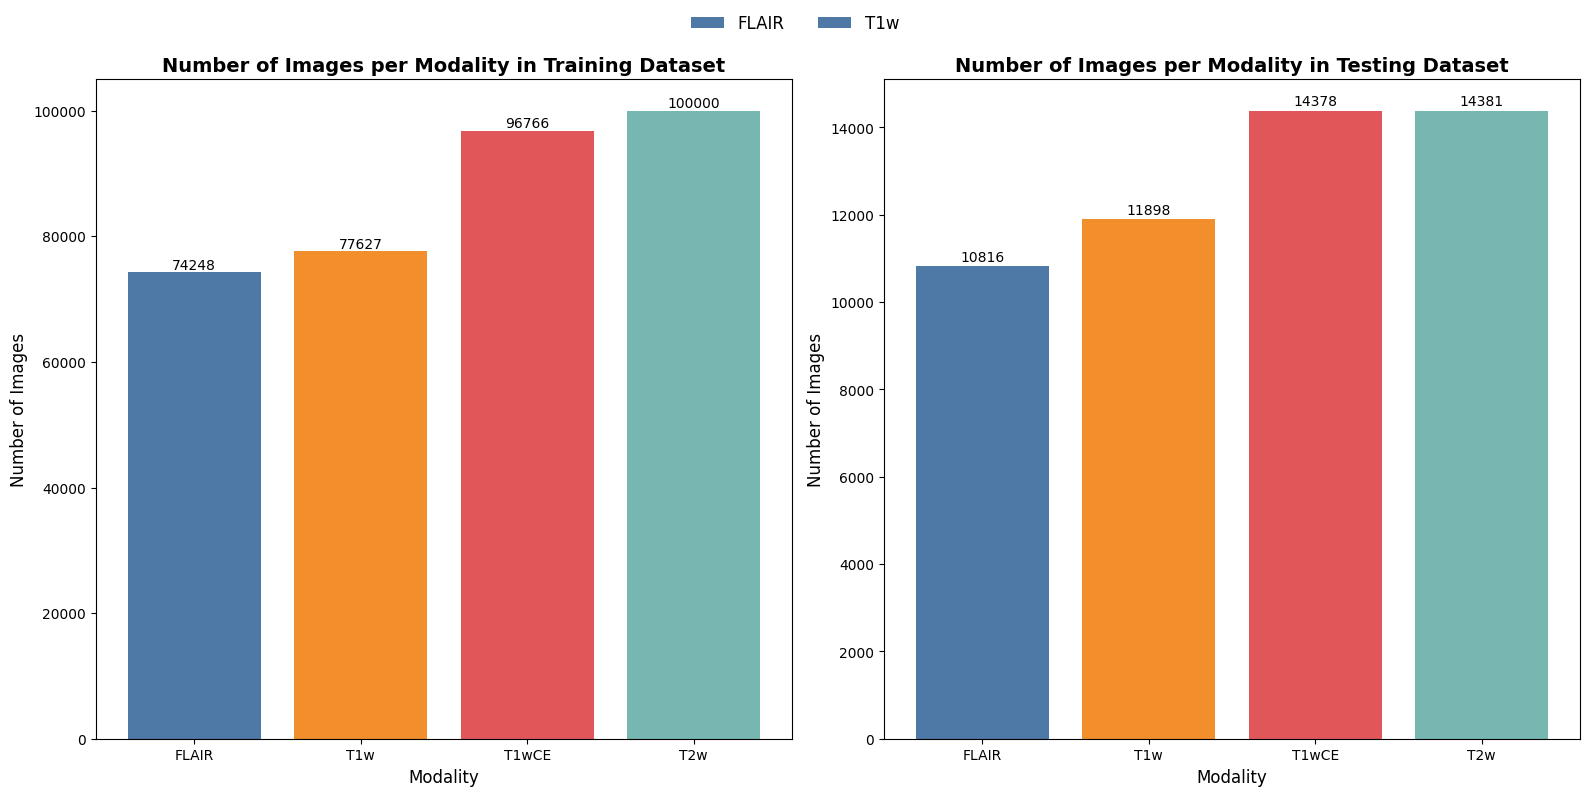

In [2]:
import os
import matplotlib.pyplot as plt

# Define the directory paths
train_dir = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train"
test_dir = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/test"

# Function to count images for each modality in each patient folder
def count_images_per_modality(directory):
    modalities = ["FLAIR", "T1w", "T1wCE", "T2w"]
    modality_counts = {modality: 0 for modality in modalities}
    
    for patient_folder in os.listdir(directory):
        patient_path = os.path.join(directory, patient_folder)
        
        # Check if it's a folder
        if os.path.isdir(patient_path):
            # Count images in each modality folder
            for modality in modalities:
                modality_path = os.path.join(patient_path, modality)
                if os.path.isdir(modality_path):
                    modality_counts[modality] += len([img for img in os.listdir(modality_path) if img.endswith(".dcm")])
    
    return modality_counts

# Get modality image counts for training and testing sets
train_modality_counts = count_images_per_modality(train_dir)
test_modality_counts = count_images_per_modality(test_dir)

# Plotting the results with improvements
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]  # Different colors for each modality

# Bar plot for train dataset
ax[0].bar(train_modality_counts.keys(), train_modality_counts.values(), color=colors)
ax[0].set_title("Number of Images per Modality in Training Dataset", fontsize=14, weight='bold')
ax[0].set_xlabel("Modality", fontsize=12)
ax[0].set_ylabel("Number of Images", fontsize=12)

# Adding annotations to the bars
for i, (modality, count) in enumerate(train_modality_counts.items()):
    ax[0].text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

# Bar plot for test dataset
ax[1].bar(test_modality_counts.keys(), test_modality_counts.values(), color=colors)
ax[1].set_title("Number of Images per Modality in Testing Dataset", fontsize=14, weight='bold')
ax[1].set_xlabel("Modality", fontsize=12)
ax[1].set_ylabel("Number of Images", fontsize=12)

# Adding annotations to the bars
for i, (modality, count) in enumerate(test_modality_counts.items()):
    ax[1].text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

# Adding a legend
fig.legend(train_modality_counts.keys(), loc="upper center", ncol=4, fontsize=12, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for legend
plt.show()

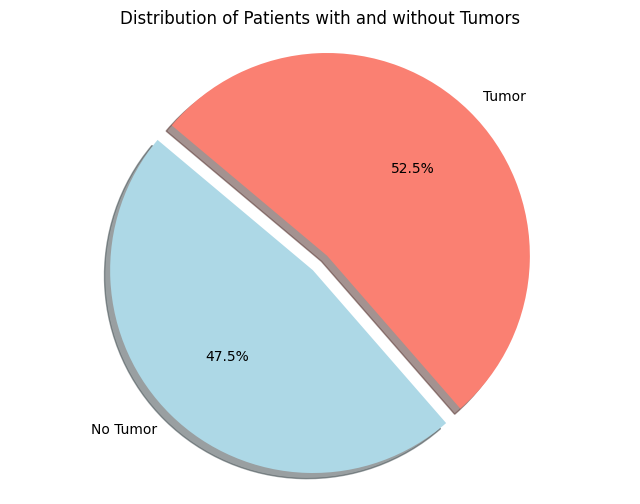

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Count the number of patients with and without tumors
tumor_counts = data['MGMT_value'].value_counts()

# Plotting
labels = ['No Tumor', 'Tumor']
sizes = [tumor_counts.get(0, 0), tumor_counts.get(1, 0)]  # Get counts for 0 and 1, default to 0 if not found
colors = ['lightblue', 'salmon']
explode = (0.1, 0)  # explode 1st slice (No Tumor)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Patients with and without Tumors')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [4]:
import os
import pandas as pd

# Define the directories and file paths
train_dir = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train"
csv_path = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv"

# Load the CSV file
labels_df = pd.read_csv(csv_path)

# Process patient IDs to remove leading zeros and use the same format in both places
labels_df['BraTS21ID'] = labels_df['BraTS21ID'].apply(lambda x: str(x).zfill(5))

# Initialize lists for analysis data and skipped IDs
analysis_data = []
skipped_ids = []

# Function to count images in a given modality folder
def count_images_in_folder(folder_path):
    return len([img for img in os.listdir(folder_path) if img.endswith(".dcm")])

# Get all patient IDs from both CSV and folders for cross-referencing
all_patient_folders = set(os.listdir(train_dir))
all_csv_ids = set(labels_df['BraTS21ID'].values)

# Iterate through each patient folder in the training directory
for patient_folder in all_patient_folders:
    patient_id = patient_folder.zfill(5)  # Ensure ID format consistency

    # Check if the patient ID exists in the labels DataFrame
    if patient_id in all_csv_ids:
        # Find corresponding label for the patient
        label_row = labels_df[labels_df['BraTS21ID'] == patient_id]
        tumor_status = label_row['MGMT_value'].values[0]

        # Initialize counts for FLAIR and T1wCE
        flair_count, t1wce_count = 0, 0

        # Define paths for FLAIR and T1wCE folders
        flair_path = os.path.join(train_dir, patient_folder, "FLAIR")
        t1wce_path = os.path.join(train_dir, patient_folder, "T1wCE")

        # Count images if the folder exists and is not empty
        if os.path.isdir(flair_path):
            flair_count = count_images_in_folder(flair_path)
        if os.path.isdir(t1wce_path):
            t1wce_count = count_images_in_folder(t1wce_path)

        # Append the data to the analysis list
        analysis_data.append({
            "Patient ID": patient_id,
            "FLAIR Count": flair_count,
            "T1wCE Count": t1wce_count,
            "Tumor Status": "Yes" if tumor_status == 1 else "No"
        })
    else:
        # Record IDs skipped due to missing labels
        skipped_ids.append({"Patient ID": patient_id, "Reason": "No label in CSV"})

# Identify and record IDs from CSV with no corresponding image folder
for csv_id in all_csv_ids:
    if csv_id not in all_patient_folders:
        skipped_ids.append({"Patient ID": csv_id, "Reason": "No image folder in train directory"})

# Create DataFrames to display analysis data and skipped IDs
analysis_df = pd.DataFrame(analysis_data)
skipped_ids_df = pd.DataFrame(skipped_ids)

# Display the tables
print("Analysis Table:")
print(analysis_df)

print("\nSkipped IDs Table:")
print(skipped_ids_df)

Analysis Table:
    Patient ID  FLAIR Count  T1wCE Count Tumor Status
0        00166           62          236          Yes
1        00830           27           27           No
2        00240           60          192          Yes
3        00760          200          176          Yes
4        00570           48           27          Yes
..         ...          ...          ...          ...
580      00324           60          192           No
581      00524          196          214          Yes
582      00606          200          190          Yes
583      00346           60          192           No
584      00451           32          212          Yes

[585 rows x 4 columns]

Skipped IDs Table:
Empty DataFrame
Columns: []
Index: []


In [5]:
import os
import numpy as np
import pydicom
from skimage.transform import resize
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_folder = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train"
csv_file = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv"

# Parameters
cnn_input_shape = (128, 64, 64)  # Depth, Height, Width
modalities = ["T1wCE"]
max_patients = (500)  # Limit for demonstration
num_classes = 2

# Preprocessing
def preprocess_patient(patient_id , folder):
    modality_volumes = []
    for modality in modalities:
        modality_folder = os.path.join(folder, patient_id, modality)
        if not os.path.isdir(modality_folder):
            return None
        
        slices = []
        for dcm_file in sorted(os.listdir(modality_folder)):
            if dcm_file.endswith(".dcm"):
                dcm_path = os.path.join(modality_folder, dcm_file)
                ds = pydicom.dcmread(dcm_path)
                slices.append(ds.pixel_array)
        
        if not slices:
            return None

        volume = np.stack(slices, axis=0).astype(np.float32)
        volume = (volume - volume.min()) / (volume.max() - volume.min())
        resized_slices = np.array([resize(slice, cnn_input_shape[1:3]) for slice in volume])

        current_depth = resized_slices.shape[0]
        if current_depth < cnn_input_shape[0]:
            pad_depth = cnn_input_shape[0] - current_depth
            resized_slices = np.pad(resized_slices, ((0, pad_depth), (0, 0), (0, 0)))
        else:
            resized_slices = resized_slices[:cnn_input_shape[0]]

        modality_volumes.append(resized_slices)

    if not modality_volumes:
        return None

    combined_volume = np.stack(modality_volumes, axis=-1)  # (Depth, Height, Width, Modalities)
    return combined_volume



In [6]:
# Prepare Data
labels_df = pd.read_csv(csv_file)
labels_df['BraTS21ID'] = labels_df['BraTS21ID'].apply(lambda x: str(x).zfill(5))
patient_labels = {row['BraTS21ID']: row['MGMT_value'] for _, row in labels_df.iterrows()}

cnn_input = []
aligned_labels = []
i=0
for patient_id in sorted(os.listdir(train_folder)):
    if len(cnn_input) >= max_patients:
        break 
    processed_data = preprocess_patient(patient_id , train_folder)
    if processed_data is not None and patient_id in patient_labels:
        cnn_input.append(processed_data)
        aligned_labels.append(patient_labels[patient_id])
        print(f"Processed Patient ID:",i)
        i+=1
        
if not cnn_input:
    raise ValueError("No valid patient data found.")

cnn_input = np.array(cnn_input)
aligned_labels = np.array(aligned_labels)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    cnn_input, aligned_labels, test_size=0.2, random_state=42
)

Processed Patient ID: 0
Processed Patient ID: 1
Processed Patient ID: 2
Processed Patient ID: 3
Processed Patient ID: 4
Processed Patient ID: 5
Processed Patient ID: 6
Processed Patient ID: 7
Processed Patient ID: 8
Processed Patient ID: 9
Processed Patient ID: 10
Processed Patient ID: 11
Processed Patient ID: 12
Processed Patient ID: 13
Processed Patient ID: 14
Processed Patient ID: 15
Processed Patient ID: 16
Processed Patient ID: 17
Processed Patient ID: 18
Processed Patient ID: 19
Processed Patient ID: 20
Processed Patient ID: 21
Processed Patient ID: 22
Processed Patient ID: 23
Processed Patient ID: 24
Processed Patient ID: 25
Processed Patient ID: 26
Processed Patient ID: 27
Processed Patient ID: 28
Processed Patient ID: 29
Processed Patient ID: 30
Processed Patient ID: 31
Processed Patient ID: 32
Processed Patient ID: 33
Processed Patient ID: 34
Processed Patient ID: 35
Processed Patient ID: 36
Processed Patient ID: 37
Processed Patient ID: 38
Processed Patient ID: 39
Processed 

In [7]:
print(X_train.shape)

(400, 128, 64, 64, 1)


In [8]:
import numpy as np
from keras import layers, models
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Multiply, GlobalAveragePooling3D, Reshape
from sklearn.metrics import roc_auc_score  # For AUC
import tensorflow as tf  # For other metrics

# Spatial Attention
def spatial_attention(feature_map):
    """
    Apply spatial attention to a 3D feature map.
    Args:
        feature_map: Keras tensor of shape (batch_size, depth, height, width, channels).
    Returns:
        Attention-weighted feature map.
    """
    attention = Conv3D(1, kernel_size=1, activation='sigmoid')(feature_map)  # Generate attention weights
    return Multiply()([feature_map, attention])  # Apply weights to the feature map

# Slice Attention
def slice_attention(volume):
    """
    Apply slice (depth) attention to a 3D volume.
    Args:
        volume: Keras tensor of shape (batch_size, depth, height, width, channels).
    Returns:
        Attention-weighted volume.
    """
    depth = volume.shape[1]
    squeeze = GlobalAveragePooling3D()(volume)  # Global pooling over spatial dimensions
    squeeze = Dense(depth, activation='sigmoid')(squeeze)  # Compute attention weights for depth
    squeeze = Reshape((depth, 1, 1, 1))(squeeze)  # Reshape for broadcasting
    return Multiply()([volume, squeeze])

# Modality Attention
def modality_attention(volume):
    """
    Apply modality attention to a multi-modal volume.
    Args:
        volume: Keras tensor of shape (batch_size, depth, height, width, modalities).
    Returns:
        Attention-weighted volume.
    """
    modalities = volume.shape[-1]
    weights = GlobalAveragePooling3D()(volume)  # Pool over spatial dimensions
    weights = Dense(modalities, activation='softmax')(weights)  # Modality-wise attention
    weights = Reshape((1, 1, 1, modalities))(weights)  # Reshape for broadcasting
    return Multiply()([volume, weights])

# Build 3D CNN with Attention
def build_3d_cnn_with_attention(input_shape):
    """
    Build a 3D CNN with spatial, slice, and modality attention.
    Args:
        input_shape: Shape of the input tensor (depth, height, width, modalities).
    Returns:
        Compiled Keras model.
    """
    input_layer = Input(shape=input_shape)

    # Conv3D + Spatial Attention
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(input_layer)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = spatial_attention(x)  # Apply spatial attention

    # Conv3D + Slice Attention
    x = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = slice_attention(x)  # Apply slice attention

    # Conv3D + Modality Attention
    x = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = modality_attention(x)  # Apply modality attention

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Define input shape
input_shape = (128, 64, 64, 1)  # Example: Depth, Height, Width, Modalities
model = build_3d_cnn_with_attention(input_shape)

# Compile the model
optimizer = Adam(learning_rate=0.0005)  # Set learning rate to 0.0005
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(name='auc') # For AUC
]



model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

# Model summary
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=5)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 64,   │          0 │ -                 │
│ (InputLayer)        │ 64, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 126, 62,   │        896 │ input_layer[0][0] │
│                     │ 62, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 63, 31,    │          0 │ conv3d[0][0]      │
│ (MaxPooling3D)      │ 31, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 63, 31,    │         33 │ max_pooling3d[0]… │
│                     │ 31, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 63, 31,    │          0 │ max_pooling3d[0]… │
│                     │ 31, 32)           │            │ conv3d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 61, 29,    │     55,360 │ multiply[0][0]    │
│                     │ 29, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 30, 14,    │          0 │ conv3d_2[0][0]    │
│ (MaxPooling3D)      │ 14, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling3d_1[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │      1,950 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 30, 1, 1,  │          0 │ dense[0][0]       │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 30, 14,    │          0 │ max_pooling3d_1[… │
│ (Multiply)          │ 14, 64)           │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 28, 12,    │    221,312 │ multiply_1[0][0]  │
│                     │ 12, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 14, 6, 6,  │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ max_pooling3d_2[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 1,   │          0 │ dense_1[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 14, 6, 6,  │          0 │ max_pooling3d_2[… │
│ (Multiply)          │ 128)              │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 16,811,648 (64.13 MB)

 Trainable params: 16,811,648 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


I0000 00:00:1732656703.107238      68 service.cc:145] XLA service 0x7b97040033d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732656703.109075      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/80 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5556 - auc: 0.5000 - loss: 0.6930 - precision: 0.5333 - recall: 0.4329

I0000 00:00:1732656710.859536      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.5547 - auc: 0.4335 - loss: 0.6927 - precision: 0.5620 - recall: 0.9398 - val_accuracy: 0.4500 - val_auc: 0.5899 - val_loss: 0.6981 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5718 - auc: 0.5433 - loss: 0.6873 - precision: 0.5718 - recall: 1.0000 - val_accuracy: 0.4500 - val_auc: 0.5879 - val_loss: 0.6973 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5574 - auc: 0.5850 - loss: 0.6864 - precision: 0.5574 - recall: 1.0000 - val_accuracy: 0.4500 - val_auc: 0.5782 - val_loss: 0.6963 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5482 - auc: 0.5965 - loss: 0.6847 - precision: 0.5482 - recall: 1.0000 - val_accuracy: 0.4500 - val_auc: 0.5913 - val_loss: 0.7016 - val_precision: 0.4500 - val_recall: 1.0000
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step


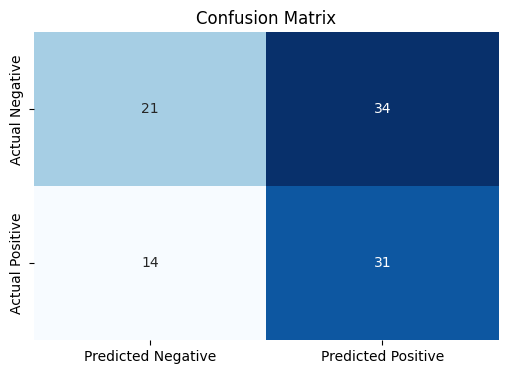

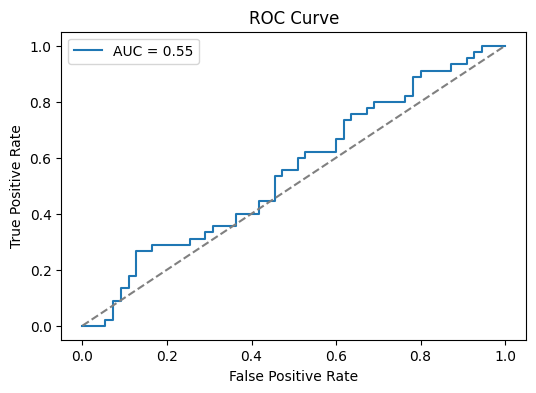

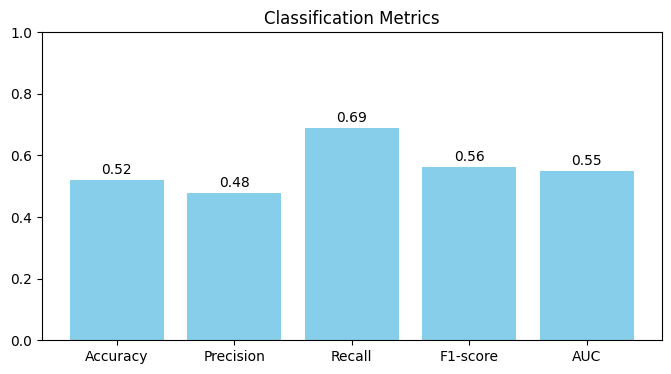

Accuracy: 0.52
Precision: 0.48
Recall: 0.69
F1-score: 0.56
AUC: 0.55


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np

# ... your training code ...

# Make predictions
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_prob)
cm = confusion_matrix(y_val, y_pred)


# --- Visualization Enhancements ---

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.show()



# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



# 3. Combined Metrics Plot
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1, "AUC": auc}
plt.figure(figsize=(8, 4))
plt.bar(metrics.keys(), metrics.values(), color="skyblue")
plt.ylim(0, 1) # Set y-axis limit for better visualization
plt.title("Classification Metrics")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center') # Add labels on top of bars
plt.show()




# Print metrics (optional, you can remove if visualized)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

In [10]:
model.save('/kaggle/working/T1wCE_model.h5')

In [11]:
def predict_all_test_patients(test_folder, model, output_file="predictions.csv"):
    """
    Predicts the labels for all patients in the test folder and saves the results.
    """
    predictions = []
    patient_ids = []

    for patient_id in sorted(os.listdir(test_folder)):
        processed_data = preprocess_patient(patient_id, test_folder)
        if processed_data is not None:
            # Expand dimensions to match input shape (1, Depth, Height, Width, Modalities)
            input_data = np.expand_dims(processed_data, axis=0)
            
            # Make prediction using the Keras model
            output = model.predict(input_data, verbose=0)  # Use verbose=0 to suppress output
            prediction = 1 if output[0] >= 0.5 else 0  # Apply threshold for binary classification
            
            predictions.append(prediction)
            patient_ids.append(patient_id)
            print(f"{patient_id}: Prediction = {prediction}")
        else:
            print(f"Skipping patient {patient_id}: Unable to preprocess data.")

    # Save predictions to a CSV file
    result_df = pd.DataFrame({"PatientID": patient_ids, "Prediction": predictions})
    result_df.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}.")

# Example usage
test_folder = "/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/test"
predict_all_test_patients(test_folder, model)


00001: Prediction = 1
00013: Prediction = 1
00015: Prediction = 1
00027: Prediction = 1
00037: Prediction = 1
00047: Prediction = 1
00079: Prediction = 1
00080: Prediction = 1
00082: Prediction = 1
00091: Prediction = 1
00114: Prediction = 0
00119: Prediction = 1
00125: Prediction = 0
00129: Prediction = 0
00135: Prediction = 1
00145: Prediction = 0
00153: Prediction = 0
00161: Prediction = 0
00163: Prediction = 0
00174: Prediction = 1
00181: Prediction = 0
00182: Prediction = 0
00190: Prediction = 0
00200: Prediction = 0
00208: Prediction = 0
00213: Prediction = 0
00229: Prediction = 1
00252: Prediction = 0
00256: Prediction = 0
00264: Prediction = 0
00287: Prediction = 0
00307: Prediction = 0
00323: Prediction = 0
00333: Prediction = 0
00335: Prediction = 0
00337: Prediction = 0
00355: Prediction = 0
00372: Prediction = 0
00381: Prediction = 0
00384: Prediction = 0
00393: Prediction = 0
00422: Prediction = 1
00428: Prediction = 0
00434: Prediction = 0
00438: Prediction = 0
00447: Pre

In [12]:
!pip install visualkeras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 18.3 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


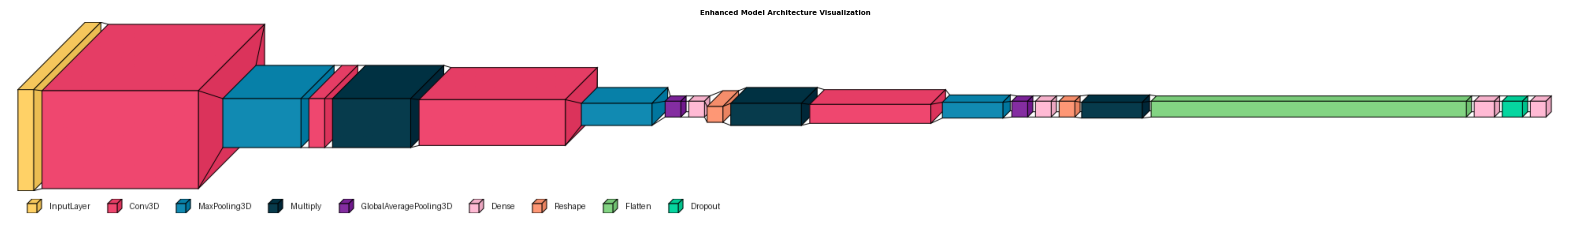

In [13]:
import visualkeras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the visualkeras layered view with enhancements
visualkeras.layered_view(
    model,
    legend=True,
    to_file='/kaggle/working/model_architecture_with_legend.png',
    scale_xy=2,
)

# Display the saved image with matplotlib enhancements
img = mpimg.imread('/kaggle/working/model_architecture_with_legend.png')
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Enhanced Model Architecture Visualization', fontsize=5, fontweight='bold')
plt.show()


In [14]:
import matplotlib.pyplot as plt

def visualize_slices(slices, title="", num_slices=5):
    """
    Visualizes slices from a 3D volume.
    """
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    step = max(1, len(slices) // num_slices)
    selected_slices = slices[::step][:num_slices]
    
    for i, slice_img in enumerate(selected_slices):
        axes[i].imshow(slice_img, cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Slice {i * step}")
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def visualize_volume(volume, title=""):
    """
    Visualizes all modalities in a combined volume.
    """
    num_modalities = volume.shape[-1]
    for modality in range(num_modalities):
        print(f"Visualizing Modality {modality + 1}")
        visualize_slices(volume[..., modality], title=f"{title} - Modality {modality + 1}")


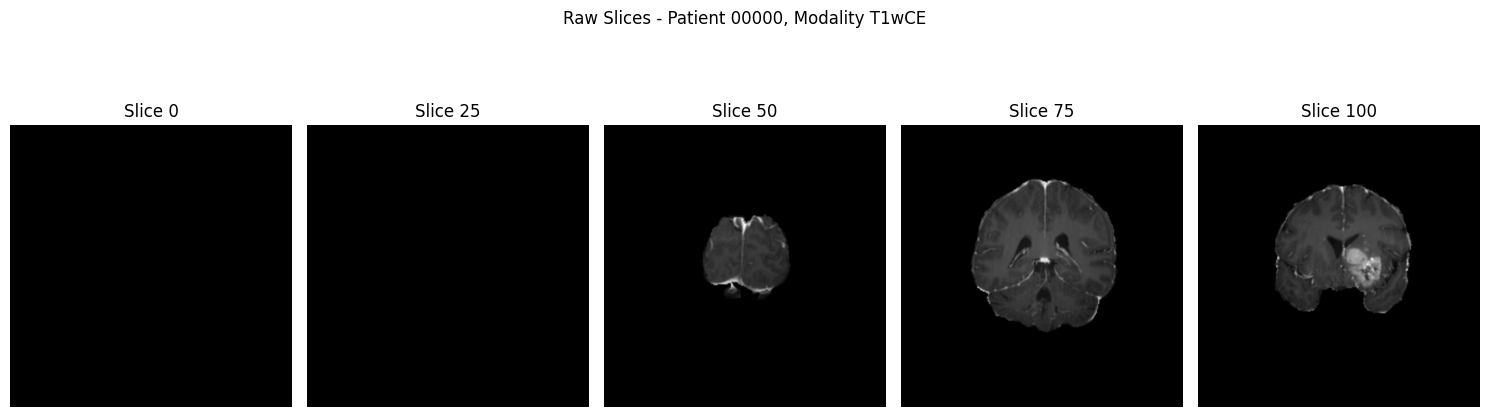

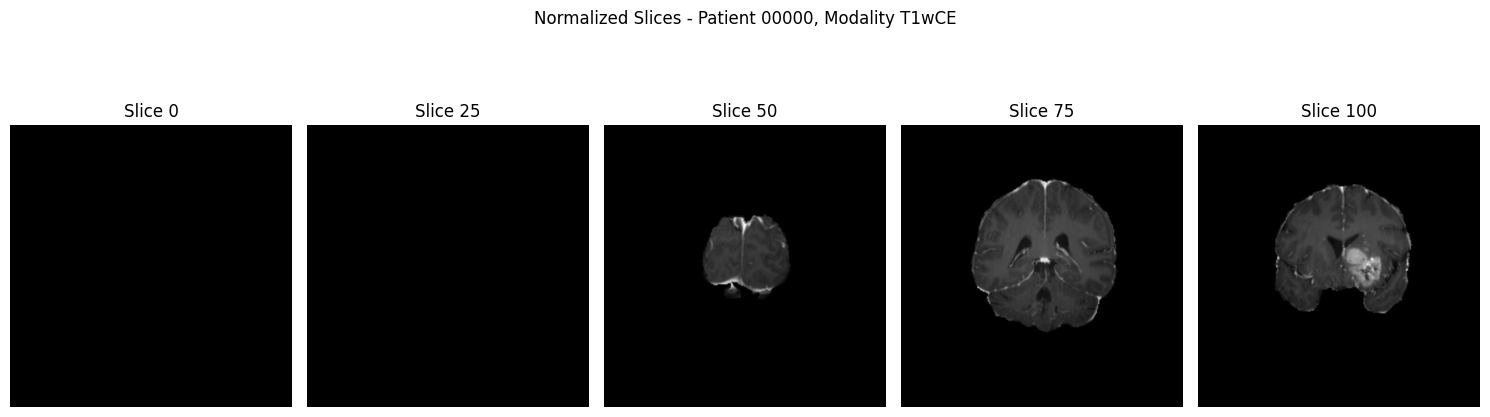

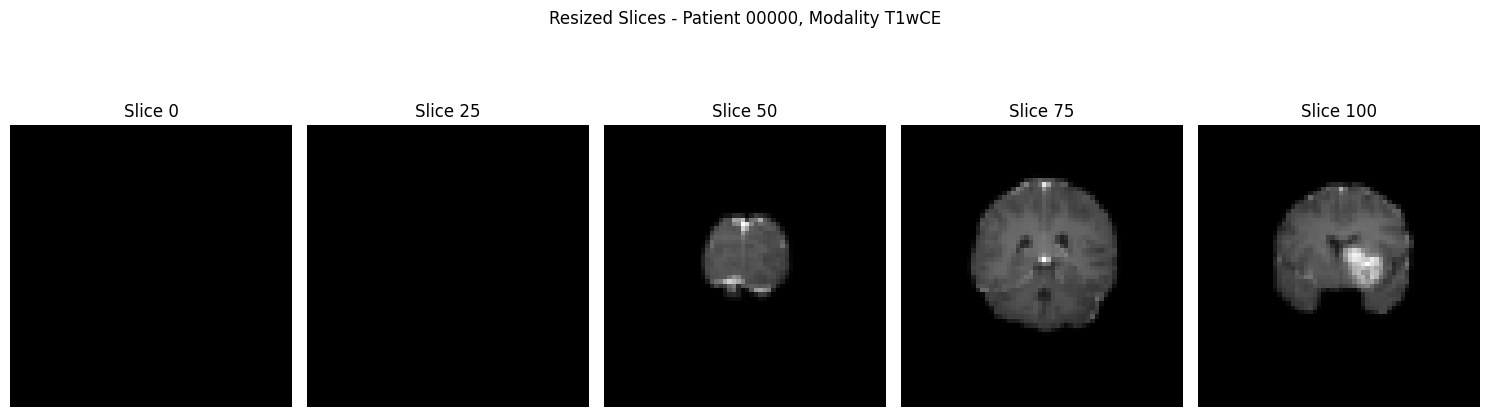

Visualizing Modality 1


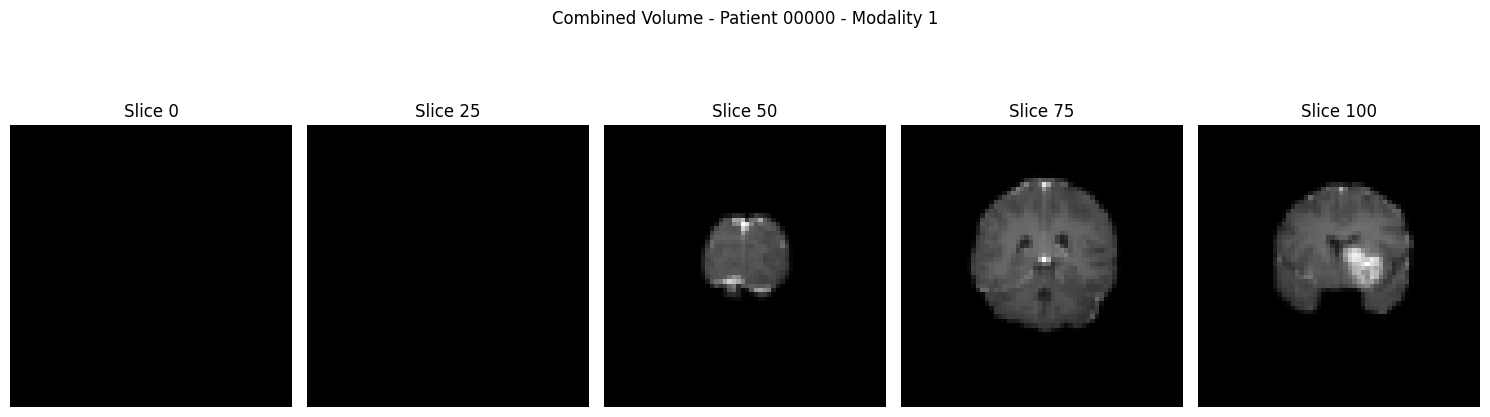

In [15]:
def preprocess_patientt(patient_id, folder, visualize=False):
    modality_volumes = []
    for modality in modalities:
        modality_folder = os.path.join(folder, patient_id, modality)
        if not os.path.isdir(modality_folder):
            return None
        
        slices = []
        for dcm_file in sorted(os.listdir(modality_folder)):
            if dcm_file.endswith(".dcm"):
                dcm_path = os.path.join(modality_folder, dcm_file)
                ds = pydicom.dcmread(dcm_path)
                slices.append(ds.pixel_array)
        
        if not slices:
            return None

        volume = np.stack(slices, axis=0).astype(np.float32)
        if visualize:
            visualize_slices(volume, title=f"Raw Slices - Patient {patient_id}, Modality {modality}")

        # Normalize
        volume = (volume - volume.min()) / (volume.max() - volume.min())
        if visualize:
            visualize_slices(volume, title=f"Normalized Slices - Patient {patient_id}, Modality {modality}")

        # Resize slices
        resized_slices = np.array([resize(slice, cnn_input_shape[1:3]) for slice in volume])
        if visualize:
            visualize_slices(resized_slices, title=f"Resized Slices - Patient {patient_id}, Modality {modality}")

        # Pad or truncate depth
        current_depth = resized_slices.shape[0]
        if current_depth < cnn_input_shape[0]:
            pad_depth = cnn_input_shape[0] - current_depth
            resized_slices = np.pad(resized_slices, ((0, pad_depth), (0, 0), (0, 0)))
        else:
            resized_slices = resized_slices[:cnn_input_shape[0]]

        modality_volumes.append(resized_slices)

    if not modality_volumes:
        return None

    combined_volume = np.stack(modality_volumes, axis=-1)  # (Depth, Height, Width, Modalities)
    if visualize:
        visualize_volume(combined_volume, title=f"Combined Volume - Patient {patient_id}")

    return combined_volume
# Example: Visualize a single patient
patient_id = "00000"  # Replace with a valid patient ID
processed_data = preprocess_patientt(patient_id, train_folder, visualize=True)
